# Supply chain distribution optimization using Genetic Algorithm- By Himanshu Bhardwaj

**Formulation of the problem**

**Decision variables**

1. $x_{ij}$: flow of material from factory i to customer j.
2. $y_{ik}$: flow of material from factory i to depot k.
3. $z_{kj}$: flow of material from depot k to customer j.

**Objective** 

to minimize overall cost

cost function = $\sum_{i=1, j=1}^{i=m, j=n} c_{ij}x_{ij} + \sum_{i=1, k=1}^{i=m, k=p} d_{ik}y_{ik} +\sum_{j=1, k=1}^{j=n, k=p} e_{jk}z_{jk}$

**subjected to**

1. Factory capacity

$\sum_{j=1}^{n} x_{ij} + \sum_{k=1}^{p} y_{ik} <= factory capacity_{i}$ $i \in {1,2,3...n}$

2. Depot inflow

$\sum_{i=1}^{m} y_{ik} <= depot capacity_{k}, k \in 1,2,...,n$

3. Depot outflow

$\sum_{i=1}^{m} y_{ik} = \sum_{k=1}^{n} z_{ik}, i \in {1,2,..m}$ 

4. customer demand

$\sum_{i=1}^{m} x_{ij} + \sum_{k=1}^{n} z_{kj} = demand_{j}, j \in 1,2,...,p$


In [1]:
import numpy as np
import pandas as pd
import random
from graphviz import Digraph

In [2]:
#Crossover
def crossover(parent1, parent2, cross_rate):
    c1 = parent1
    c2 = parent2
    if np.random.rand() < cross_rate:
        pos = np.random.randint(1,len(parent1)-2)
        c1 = parent1[:pos] + parent2[pos:]
        c2 = parent2[:pos] + parent1[pos:]
    return [c1,c2]

In [3]:
def mutation(genes, mut_rate):
    for i in range(len(genes)):
        if np.random.rand()<mut_rate:
            genes[i] = random.randint(0,50)
    return genes

In [4]:
error = []
def GA_function(fitness, bitsize, iterations, pop_size, cross_rate, mut_rate):
    #initial population
    #init_pop = [np.random.randint(0,2,bitsize).tolist() for _ in range(pop_size)]
    init_pop = [np.random.randint(0,40, bitsize).tolist() for _ in range(pop_size)]
    best = 0
    best_fitvalue = fitness(init_pop[best])
    for gen in range(iterations):
        fitscore = [fitness(c) for c in init_pop]
        for i in range(pop_size):
            if fitness(init_pop[i]) < best_fitvalue:
                best, best_fitvalue = init_pop[i], fitness(init_pop[i])
                print(">%d, new best fit f(%s) = %.3f"%(gen, best, best_fitvalue))
        selected = [selection(init_pop, fitscore) for _ in range(pop_size)]
        # create offsprings
        offspring = list()
        for i in range(0, pop_size, 2):
            p1,p2 = selected[i], selected[i+1]
            for c in crossover(p1,p2,cross_rate):
                cc = mutation(c, mut_rate)
                offspring.append(cc)
        init_pop = offspring
        error.append(best_fitvalue)
    return [best, best_fitvalue]

In [5]:
def selection(population, fitscore):
    index = np.random.randint(len(population))
    for ix in np.random.randint(0,len(population),1):
        if fitscore[ix] < fitscore[index]:
            index = ix
    return population[index]  

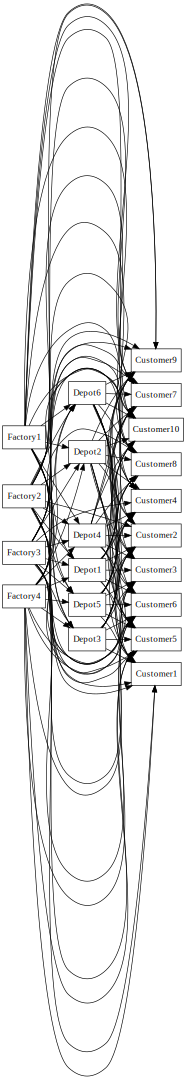

In [25]:
#decision variables
f = list(range(4)) # factory
d = list(range(6)) # depot
c = list(range(10)) # customers
aa = []
for i in f:
    for j in d:
        aa.append(["Factory"+str(i+1), "Depot"+str(j+1)])
    for ci in c:
        aa.append(["Factory"+str(i+1), "Customer"+str(ci+1)])
for i in d:
    for j in c:
        aa.append(['Depot'+str(i+1), 'Customer'+str(j+1)])
df = pd.DataFrame(aa, columns=['Pred', 'succ'])
def disp_graph(df):
    gg = Digraph('finite_state_machine', filename='fsm.gv')
    gg.attr(rankdir='LR', size='18,15')
    gg.attr('node', shape='rectangle')
    for index, row in df.iterrows():
        gg.edge(row[0],row[1])
    return gg
G = disp_graph(df)
G

In [6]:
n_factory = 4
n_depot = 6
n_customers = 10
bitsize = n_factory*n_customers+n_factory*n_depot+ n_depot*n_customers
iterations = 1000
pop_size =100
cross_rate = 0.9
mut_rate = 1/float(bitsize)
demand = np.random.randint(40,60,n_customers).tolist()
factory_capacity = 520
depot_capacity = 160

In [7]:
def decode(genes):
    a = []
    b = []
    c = []
    for i in range(n_factory):
        start, end = i*n_customers, (i*n_customers)+n_customers
        a.append(genes[start:end])
    start1 =end
    #print(start1)
    for j in range(n_factory):
        start, end = start1+j*n_depot, start1 + (j*n_depot) + n_depot
        b.append(genes[start:end])
    start2 = end
    #print(start2)
    for k in range(n_depot):
        start, end = start2 + k*n_customers, start2+(k*n_customers) + n_customers
        c.append(genes[start:end])
    start3=end
    #print(start3)
    return a, b, c

In [8]:
#generate random cost however actual cost matrix will be used later
fc_cost = [np.random.randint(4,15,10) for _ in range(n_factory)]
fd_cost = [np.random.randint(2,10,6) for _ in range(n_factory)]
dc_cost = [np.random.randint(3,10, 10) for _ in range(n_depot)]

In [9]:
fd_cost

[array([7, 9, 4, 7, 4, 2]),
 array([8, 7, 4, 2, 2, 4]),
 array([8, 7, 2, 2, 4, 8]),
 array([4, 6, 5, 5, 2, 3])]

In [10]:
# To be modified
def fitness(genes):
    f_c,f_d,d_c = decode(genes)
    #generate random cost however actual cost matrix will be used later
    #fc_cost = [np.random.randint(4,15,10) for _ in range(n_factory)]
    #fd_cost = [np.random.randint(2,10,6) for _ in range(n_factory)]
    #dc_cost = [np.random.randint(3,10, 10) for _ in range(n_depot)]
    def factory_cons():
        overcap1 = 0
        for i in range(n_factory):
            if sum(f_c[i])+sum(f_d[i]) > factory_capacity:
                overcap1+=1
               # print('factory')
        return overcap1
    def depot_cons():
        overcap2 =0
        for i in range(n_depot):
            if sum(d_c[i]) > depot_capacity:
                overcap2+=1
                #print('depot')
        return overcap2
    def depot_flow():
        overcap3 = 0
        for i in range(n_depot):
            if sum(np.transpose(f_d)[i])<sum(d_c[i]):
                overcap3+=1
                #print('depotflow',sum(np.transpose(f_d)[i]),sum(d_c[i]))
        return overcap3
    def customer_cons():
        overcap4 =0
        for i in range(n_customers):
            if sum(np.transpose(f_c)[i]) + sum(np.transpose(d_c)[i]) < demand[i]:
                overcap4+=1
                #print('customer')
        return overcap4
    fc = np.sum(np.multiply(fc_cost,f_c))
    fd = np.sum(np.multiply(fd_cost,f_d))
    dc = np.sum(np.multiply(dc_cost,d_c))
    total_cost = fc+fd+dc+50000*(factory_cons()+depot_cons()+depot_flow()+customer_cons())
    #print(fc+fd+dc)
    return total_cost

In [11]:
best, best_value = GA_function(fitness, bitsize, iterations, pop_size, cross_rate, mut_rate)

>0, new best fit f([24, 0, 37, 28, 21, 23, 38, 2, 16, 36, 37, 38, 21, 21, 16, 14, 27, 34, 15, 12, 30, 16, 15, 0, 39, 26, 1, 20, 32, 16, 22, 20, 37, 31, 9, 4, 39, 15, 11, 6, 4, 31, 8, 5, 6, 16, 1, 26, 1, 24, 6, 26, 9, 31, 9, 13, 2, 1, 37, 5, 10, 8, 13, 31, 18, 0, 31, 8, 24, 0, 12, 34, 37, 21, 17, 1, 10, 32, 5, 16, 36, 9, 31, 19, 39, 34, 37, 1, 25, 1, 34, 16, 18, 35, 37, 25, 18, 3, 4, 1, 38, 13, 29, 20, 19, 33, 2, 2, 8, 31, 30, 21, 24, 13, 12, 5, 22, 12, 21, 12, 33, 11, 8, 18]) = 566440.000
>0, new best fit f([34, 21, 8, 6, 30, 35, 20, 35, 12, 27, 6, 18, 35, 39, 17, 12, 34, 7, 20, 25, 13, 37, 2, 39, 23, 1, 20, 18, 26, 20, 7, 12, 9, 25, 22, 6, 33, 28, 31, 22, 29, 34, 15, 33, 27, 2, 15, 6, 21, 13, 6, 19, 12, 7, 1, 14, 35, 0, 18, 19, 30, 9, 23, 35, 21, 3, 9, 8, 1, 8, 11, 13, 39, 15, 27, 0, 30, 19, 22, 20, 39, 29, 30, 1, 24, 2, 12, 3, 2, 7, 2, 3, 18, 27, 39, 17, 1, 5, 24, 30, 31, 6, 3, 26, 34, 19, 35, 2, 32, 33, 9, 36, 31, 16, 2, 31, 16, 1, 33, 8, 30, 23, 17, 19]) = 516571.000
>0, new best f

>16, new best fit f([4, 10, 13, 0, 30, 35, 32, 9, 3, 17, 9, 2, 13, 3, 5, 2, 9, 26, 6, 24, 27, 30, 34, 16, 32, 8, 6, 32, 7, 34, 6, 13, 32, 39, 11, 32, 0, 0, 2, 4, 13, 7, 37, 11, 20, 39, 25, 46, 13, 25, 38, 2, 6, 32, 35, 27, 6, 43, 1, 39, 34, 36, 17, 2, 3, 2, 16, 2, 6, 28, 24, 33, 23, 22, 0, 11, 1, 1, 7, 38, 6, 15, 10, 19, 39, 19, 3, 19, 0, 13, 7, 8, 9, 1, 2, 0, 25, 2, 16, 25, 6, 31, 7, 17, 38, 14, 11, 12, 0, 24, 6, 25, 17, 2, 31, 0, 13, 3, 11, 16, 14, 9, 37, 25]) = 213174.000
>16, new best fit f([4, 10, 13, 0, 30, 35, 32, 9, 3, 17, 9, 2, 13, 3, 5, 2, 9, 38, 6, 24, 27, 30, 34, 16, 32, 8, 6, 32, 7, 34, 6, 13, 32, 39, 11, 32, 0, 0, 2, 4, 13, 7, 37, 11, 20, 39, 25, 46, 13, 25, 38, 2, 6, 32, 35, 27, 6, 43, 1, 39, 34, 36, 17, 2, 3, 1, 16, 2, 6, 28, 24, 33, 23, 22, 0, 11, 1, 1, 7, 38, 6, 15, 10, 19, 39, 19, 3, 19, 0, 13, 7, 8, 9, 1, 2, 0, 25, 2, 16, 26, 7, 14, 0, 11, 12, 8, 23, 1, 1, 36, 8, 29, 15, 14, 22, 4, 20, 1, 9, 1, 13, 8, 3, 0]) = 162850.000
>17, new best fit f([4, 10, 13, 0, 30, 35, 32

>60, new best fit f([4, 8, 7, 11, 15, 28, 35, 9, 3, 17, 9, 1, 13, 3, 5, 2, 9, 26, 19, 2, 27, 6, 48, 27, 19, 8, 23, 19, 40, 18, 18, 15, 9, 11, 1, 13, 0, 0, 2, 3, 20, 28, 35, 32, 5, 39, 2, 38, 28, 48, 38, 49, 6, 32, 35, 31, 45, 37, 1, 39, 34, 36, 17, 2, 4, 11, 16, 2, 5, 10, 2, 13, 10, 23, 0, 11, 1, 0, 4, 2, 25, 15, 10, 19, 11, 15, 3, 19, 0, 13, 7, 8, 9, 1, 4, 0, 25, 2, 16, 1, 6, 14, 0, 11, 15, 2, 13, 1, 0, 24, 6, 25, 17, 2, 31, 0, 13, 1, 9, 1, 9, 8, 3, 37]) = 61116.000
>61, new best fit f([4, 8, 7, 26, 15, 28, 32, 9, 3, 12, 9, 2, 12, 17, 28, 1, 9, 3, 6, 2, 27, 6, 34, 27, 19, 8, 31, 19, 2, 25, 4, 15, 9, 1, 1, 13, 28, 4, 29, 3, 17, 9, 35, 3, 5, 39, 10, 46, 17, 48, 7, 40, 6, 32, 35, 14, 6, 43, 35, 12, 34, 36, 17, 2, 6, 1, 16, 2, 5, 10, 2, 13, 10, 3, 0, 11, 10, 2, 4, 2, 25, 15, 10, 19, 11, 15, 3, 19, 0, 13, 7, 8, 9, 1, 2, 0, 25, 2, 16, 1, 6, 14, 0, 11, 12, 14, 13, 12, 0, 24, 6, 25, 17, 2, 31, 0, 13, 1, 9, 1, 9, 8, 3, 0]) = 60526.000
>62, new best fit f([4, 8, 7, 26, 15, 28, 21, 9, 3, 17, 9, 

>94, new best fit f([4, 8, 7, 11, 2, 2, 0, 36, 3, 12, 9, 1, 8, 3, 5, 1, 9, 21, 6, 2, 12, 6, 34, 27, 19, 8, 23, 19, 2, 18, 4, 15, 9, 3, 1, 13, 0, 0, 2, 24, 30, 5, 35, 3, 5, 5, 10, 46, 15, 43, 35, 40, 6, 32, 35, 31, 6, 43, 35, 44, 7, 36, 32, 2, 6, 1, 16, 2, 5, 10, 2, 13, 10, 3, 0, 11, 10, 2, 4, 2, 3, 25, 10, 19, 11, 15, 3, 19, 0, 13, 7, 8, 9, 1, 4, 0, 25, 2, 16, 1, 6, 14, 0, 11, 13, 10, 4, 1, 0, 24, 6, 8, 6, 2, 2, 0, 13, 1, 15, 1, 9, 8, 3, 10]) = 8922.000
>101, new best fit f([4, 49, 7, 11, 2, 26, 7, 3, 3, 5, 9, 1, 13, 3, 5, 4, 9, 30, 6, 2, 12, 6, 34, 27, 18, 8, 23, 19, 2, 4, 4, 15, 9, 3, 1, 13, 0, 0, 2, 24, 30, 5, 35, 3, 5, 5, 10, 46, 15, 43, 35, 40, 6, 32, 35, 31, 6, 43, 35, 44, 7, 36, 32, 2, 6, 1, 16, 2, 5, 10, 2, 13, 10, 3, 0, 11, 10, 2, 4, 2, 25, 25, 10, 19, 0, 10, 3, 19, 0, 13, 4, 14, 9, 1, 2, 0, 5, 2, 16, 1, 6, 14, 0, 3, 13, 10, 4, 1, 0, 24, 6, 8, 6, 2, 2, 8, 13, 1, 15, 1, 3, 8, 3, 0]) = 8869.000
>104, new best fit f([4, 49, 7, 11, 2, 2, 7, 3, 3, 5, 9, 1, 44, 3, 0, 2, 9, 42, 6, 2,

>127, new best fit f([4, 8, 7, 11, 2, 12, 7, 3, 3, 5, 9, 1, 18, 3, 5, 4, 9, 30, 6, 2, 12, 6, 34, 27, 19, 8, 23, 19, 2, 4, 4, 15, 9, 3, 1, 13, 0, 0, 2, 24, 30, 5, 35, 3, 5, 5, 10, 46, 16, 43, 35, 40, 6, 32, 35, 31, 30, 9, 41, 23, 7, 36, 32, 2, 6, 1, 16, 2, 5, 10, 2, 13, 10, 3, 0, 11, 10, 2, 4, 2, 3, 25, 10, 2, 0, 10, 3, 19, 0, 13, 7, 8, 9, 1, 4, 0, 25, 2, 13, 1, 6, 14, 0, 11, 13, 8, 4, 1, 0, 10, 6, 8, 3, 2, 2, 8, 13, 1, 15, 1, 3, 8, 3, 0]) = 8030.000
>140, new best fit f([4, 8, 7, 11, 2, 2, 7, 3, 3, 5, 9, 1, 18, 3, 5, 4, 9, 30, 6, 2, 12, 6, 34, 27, 19, 9, 23, 19, 2, 4, 4, 15, 9, 3, 1, 13, 0, 0, 2, 10, 17, 14, 35, 3, 5, 5, 10, 46, 0, 43, 35, 24, 6, 32, 35, 31, 6, 43, 41, 23, 7, 36, 32, 2, 6, 1, 16, 2, 5, 4, 2, 13, 10, 3, 0, 11, 10, 2, 7, 2, 3, 25, 10, 19, 0, 10, 3, 19, 0, 13, 4, 14, 9, 1, 2, 0, 5, 2, 16, 15, 6, 14, 0, 11, 13, 10, 4, 1, 0, 10, 6, 8, 3, 2, 2, 8, 13, 1, 15, 1, 3, 8, 3, 0]) = 7938.000
>141, new best fit f([4, 8, 7, 4, 6, 2, 7, 3, 3, 5, 9, 1, 6, 3, 5, 4, 9, 21, 6, 2, 12, 9, 3

>446, new best fit f([0, 26, 7, 2, 2, 12, 7, 3, 0, 5, 16, 1, 8, 0, 0, 4, 9, 35, 5, 2, 2, 4, 11, 32, 7, 8, 23, 29, 18, 4, 4, 18, 1, 3, 0, 5, 0, 0, 2, 5, 23, 14, 8, 11, 10, 21, 10, 20, 12, 10, 41, 1, 6, 16, 39, 13, 9, 19, 41, 23, 22, 4, 32, 49, 5, 1, 9, 5, 23, 4, 3, 2, 10, 3, 0, 9, 3, 10, 4, 2, 3, 8, 10, 14, 1, 0, 3, 7, 0, 10, 2, 1, 4, 12, 2, 0, 5, 1, 7, 1, 6, 7, 0, 1, 13, 16, 4, 4, 3, 20, 4, 1, 4, 1, 23, 2, 21, 1, 10, 1, 3, 25, 3, 0]) = 6500.000
>452, new best fit f([0, 26, 7, 3, 2, 10, 7, 3, 0, 5, 12, 1, 8, 0, 0, 4, 9, 18, 5, 2, 3, 4, 11, 32, 7, 8, 23, 29, 18, 4, 4, 18, 1, 3, 0, 5, 0, 0, 2, 5, 23, 14, 8, 11, 10, 21, 10, 20, 12, 10, 41, 1, 6, 16, 39, 31, 9, 19, 41, 16, 13, 4, 32, 49, 5, 1, 9, 5, 23, 4, 3, 2, 10, 3, 0, 9, 3, 10, 4, 2, 3, 8, 10, 14, 1, 0, 3, 7, 28, 10, 2, 1, 4, 12, 2, 0, 5, 8, 7, 3, 6, 7, 0, 1, 13, 16, 4, 4, 3, 20, 4, 1, 4, 1, 17, 2, 6, 1, 9, 1, 3, 0, 12, 0]) = 6487.000
>458, new best fit f([0, 8, 7, 2, 2, 12, 7, 3, 0, 5, 19, 1, 8, 0, 0, 4, 9, 18, 5, 2, 12, 9, 20, 32, 7, 

>971, new best fit f([2, 23, 3, 2, 14, 12, 12, 3, 8, 5, 11, 1, 21, 0, 0, 2, 9, 16, 0, 2, 3, 4, 11, 10, 11, 5, 10, 14, 18, 9, 4, 0, 12, 1, 0, 4, 0, 1, 7, 5, 11, 8, 9, 0, 10, 16, 6, 41, 4, 48, 36, 7, 7, 16, 48, 41, 7, 0, 40, 4, 18, 3, 39, 49, 5, 1, 6, 0, 15, 4, 8, 2, 10, 4, 0, 9, 3, 0, 1, 2, 3, 3, 4, 14, 1, 0, 1, 16, 0, 17, 2, 15, 1, 15, 1, 0, 7, 9, 14, 1, 6, 12, 0, 3, 14, 11, 4, 14, 6, 8, 2, 1, 0, 1, 7, 9, 3, 8, 9, 1, 9, 0, 0, 0]) = 5575.000
>989, new best fit f([2, 23, 3, 2, 14, 12, 12, 3, 8, 5, 11, 1, 21, 0, 0, 2, 9, 16, 0, 2, 2, 4, 11, 10, 11, 26, 10, 14, 18, 9, 4, 0, 5, 1, 0, 4, 0, 1, 7, 5, 3, 8, 4, 0, 10, 11, 6, 13, 12, 48, 36, 10, 6, 36, 50, 25, 7, 0, 40, 4, 18, 3, 39, 49, 5, 1, 6, 0, 15, 4, 8, 2, 10, 4, 0, 9, 3, 8, 1, 2, 3, 3, 4, 14, 1, 0, 1, 16, 0, 17, 2, 15, 1, 15, 1, 0, 7, 9, 14, 1, 15, 7, 0, 3, 14, 11, 4, 14, 6, 8, 2, 1, 0, 1, 7, 3, 11, 8, 9, 1, 9, 0, 0, 0]) = 5505.000
>990, new best fit f([2, 23, 3, 2, 14, 12, 12, 3, 8, 5, 11, 1, 21, 0, 0, 2, 9, 16, 0, 2, 2, 4, 11, 10, 11, 2

In [12]:
import matplotlib.pyplot as plt

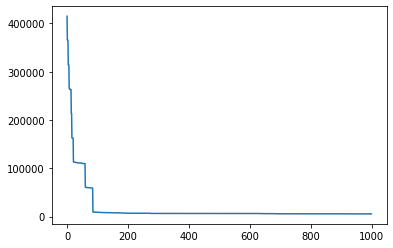

In [13]:
plt.plot(error)

In [14]:
aa, bb, cc = decode(best)

# Factory to customer

In [18]:
factory_to_customer = pd.DataFrame(aa, columns=['cust1','cust2','cust3','cust4','cust5','cust6','cust7',
                                               'cust8','cus9','cust10'])
factory_to_customer.index = ['factory1','factory2','factory3','factory4']
factory_to_customer

,cust1,cust2,cust3,cust4,cust5,cust6,cust7,cust8,cus9,cust10
factory1,2,23,3,2,14,12,12,3,8,5
factory2,11,1,21,0,0,2,9,16,0,2
factory3,2,4,11,10,11,26,10,14,18,5
factory4,4,0,5,1,0,4,0,1,7,5


# Factory to depot

In [19]:
factory_to_depot = pd.DataFrame(bb, columns=['depot1','depot2','depot3','depot4','depot5','depot6'])
factory_to_depot.index = ['factory1','factory2','factory3','factory4']
factory_to_depot

,depot1,depot2,depot3,depot4,depot5,depot6
factory1,3,8,4,0,10,11
factory2,6,13,12,48,36,10
factory3,6,36,50,25,7,0
factory4,40,4,18,3,39,49


# Depot to customer

In [20]:
depot_to_customer = pd.DataFrame(cc, columns=['cust1','cust2','cust3','cust4','cust5','cust6','cust7',
                                               'cust8','cus9','cust10'])
depot_to_customer.index = ['depot1','depot2','depot3','depot4','depot5','depot6']
depot_to_customer

,cust1,cust2,cust3,cust4,cust5,cust6,cust7,cust8,cus9,cust10
depot1,5,1,6,0,15,4,8,2,10,4
depot2,0,9,3,8,1,2,3,3,4,14
depot3,1,0,14,16,0,17,2,15,1,15
depot4,1,0,7,9,14,1,15,7,0,3
depot5,14,11,4,14,6,8,2,1,0,1
depot6,7,3,11,1,9,1,9,0,0,10
